In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [11]:
df = pd.read_csv('water_potability.csv')

x = df.iloc[:, :-1]
y = df.iloc[:, -1]
x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [13]:
from xgboost import XGBClassifier
train_scores = []
test_scores = []
n_estimators_range = range(60, 300, 30)
max_depth_range = range(3, 11)

for n_estimators in n_estimators_range:
    xgbc = XGBClassifier(n_estimators=n_estimators, max_depth=n_estimators//30 + 1, use_label_encoder=False, eval_metric='logloss')
    xgbc.fit(X_train, y_train)

    train_scores.append(accuracy_score(y_train, xgbc.predict(X_train)))
    test_scores.append(accuracy_score(y_test, xgbc.predict(X_test)))


In [14]:
print("Accuracy is :",accuracy_score(y_test, xgbc.predict(X_test)))

Accuracy is : 0.6581892166836215


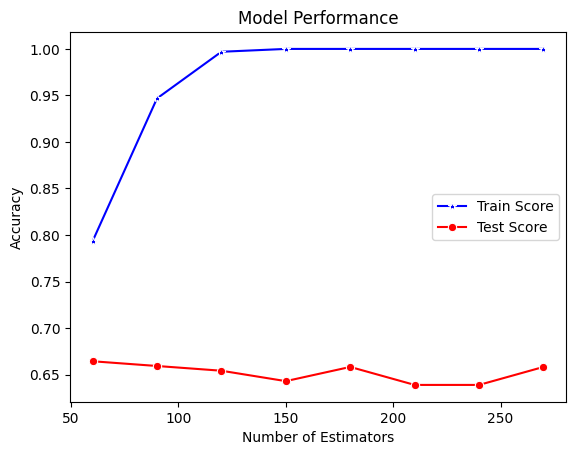

In [15]:
sns.lineplot(x=list(n_estimators_range), y=train_scores, marker='*', color='b', label='Train Score')
sns.lineplot(x=list(n_estimators_range), y=test_scores, marker='o', color='r', label='Test Score')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.legend()
plt.show()

In [17]:
a = list(map(float, input("\nEnter the numbers (separated by spaces): ").strip().split()))[:9]

input_df = pd.DataFrame([a], columns=x.columns)
user_prediction = xgbc.predict(input_df)
print("Potability :", user_prediction[0])


Enter the numbers (separated by spaces): 8.0 224.23 19909.5 9.27 348.77 592.88 16.18001 56.329 4.5
Predicted Potability for example input: 0
